In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [4]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
# Add 'overweight' column
bmi = df["weight"] / ((df["height"] / 100) ** 2)
overweight = bmi > 25
df["overweight"] = overweight.astype(int)

In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of
# 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more
# than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] > 1, 1, 0)
df["gluc"] = np.where(df["gluc"] > 1, 1, 0)

In [7]:
# Create DataFrame for cat plot using `pd.melt` using just the values
# from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and
# 'overweight'.
df_cat = pd.melt(frame=df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [8]:
# Group and reformat the data to split it by 'cardio'. Show the counts
# of each feature. You will have to rename one of the collumns for the
# catplot to work correctly.
# NOTE: groupby values from example plot
df_cat = pd.DataFrame(df_cat.groupby(["variable", "value", "cardio"])['value'].count()).rename(columns={'value': 'total'}).reset_index()
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


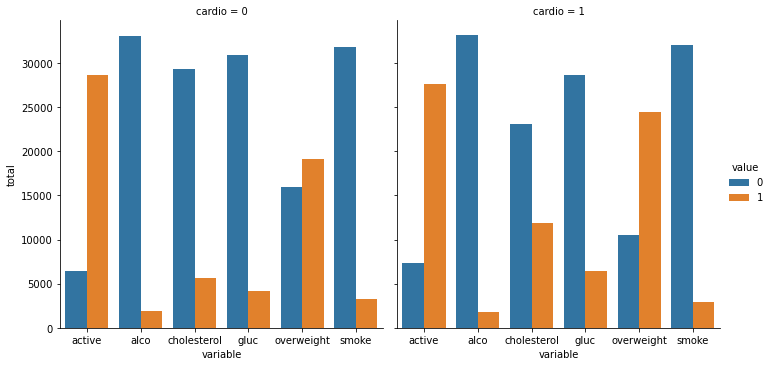

In [9]:
sns.catplot(x="variable", y="total", hue="value", col="cardio",data=df_cat , kind="bar")

In [10]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [11]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [12]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

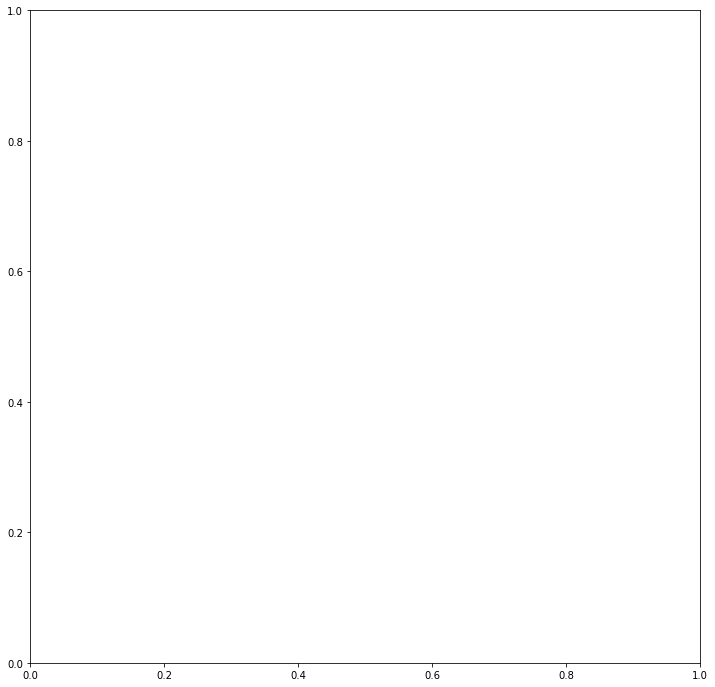

In [13]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

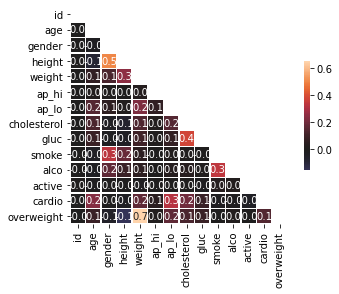

In [14]:
sns.heatmap(
        data=corr,
        annot=True,
        fmt=".1f",
        mask=mask,
        square=True,
        linewidths=0.5,
        center=0,
        cbar_kws={"shrink": 0.5},
    )